<a href="https://colab.research.google.com/github/Nichlas0403/SOM_Heart-Disease/blob/main/SOM_Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Goal

**Predicting heart disease using machine learning**

This notebook tries to create a self-organized map of data where some patiens have a heart disease and some doesn't. The data that will be used already contains a target column telling this information for each patient. When creating the SOM, this column will be removed. 

## 1. Problem Definition

Given clinical parameters about a patient, can we predict wether or not they have heart disease?

## 2. Data

The original data came from Cleveland data from the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/heart+Disease 
    

## 3. Features

14 attributes used:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

#Preparation

In [1]:
#Importing tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

In [2]:
## Load data
df = pd.read_csv("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Self-Organizing Maps/Heart Disease/data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df["id"] = pd.Series(range(0,len(df)))

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,id
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4


In [6]:
df = df.sample(frac=1)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,id
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0,171
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0,288
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,163
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0,212
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0,250


In [10]:
df = df.drop("target",axis=1)

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,id
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,171
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,288
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,163
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,212
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,250


# DEA

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
id          0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,id
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,151.000000
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,87.612784
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,75.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,151.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,226.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,302.000000


##Age

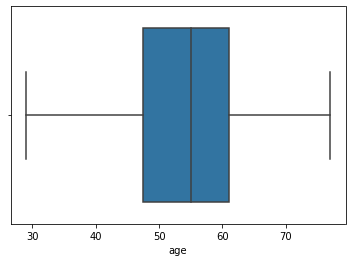

In [14]:
#Identify outliers
sns.boxplot(x="age",data=df)

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

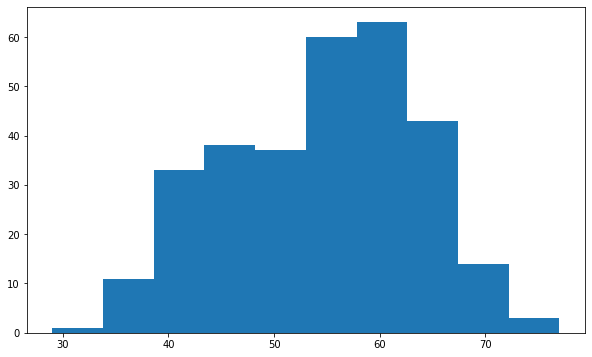

In [15]:
#Destribution of age
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df["age"])

###Evaluation

The age seems distributed, and acording to the boxplot, it doesn't contain any outliers.

##Sex

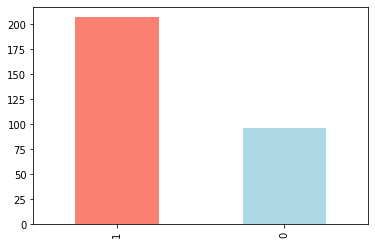

In [16]:
#Destribution of sex
df["sex"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [17]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

###Evaluation

Twice as many female as there are males. If we had the target column, it would be interesting to see how these numbers where distributed on the target values.

##Chest pain

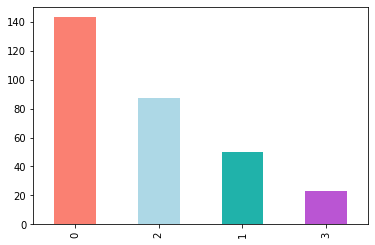

In [18]:
#Destribution of cp
df["cp"].value_counts().plot(kind="bar", color=["salmon", "lightblue","lightseagreen","mediumorchid"]);

###Evaluation

Fewer occasion where the sample had heavier chestpain.

##Resting blood pressuret

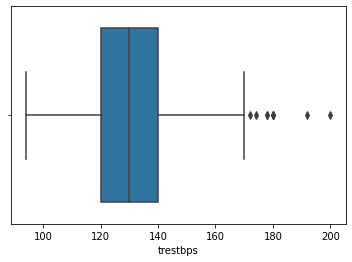

In [19]:
#Identify outliers
sns.boxplot(x="trestbps",data=df)

In [20]:
#All above this quantile is considered an outlier.
#the values of samples higher than this, will be sat to the value of the .75 quantile
df["trestbps"].quantile(0.97)

170.0

In [21]:
df["trestbps"].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [22]:
df["trestbps"] = np.where(df["trestbps"] > 170, 140, df["trestbps"])

In [23]:
#max value is now 170
df["trestbps"].describe()

count    303.000000
mean     130.389439
std       15.223723
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: trestbps, dtype: float64

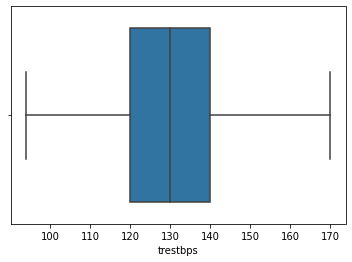

In [24]:
#boxplot contains no outliers
sns.boxplot(x="trestbps",data=df)

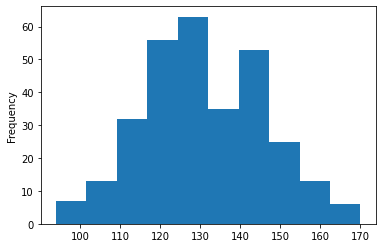

In [25]:
#Distribution of resting blood preasure
df["trestbps"].plot(kind="hist")

###Evauluation

Outliers have had their values changed to the value of the 0.75 percentile.

##Fasting blood sugar

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,id
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,171
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,288
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,163
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,212
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,250


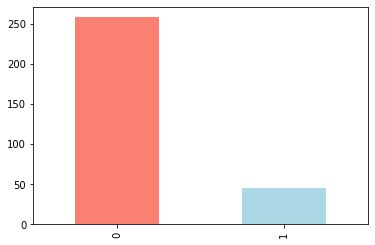

In [27]:
#Destribution of cp
df["fbs"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

##restecg

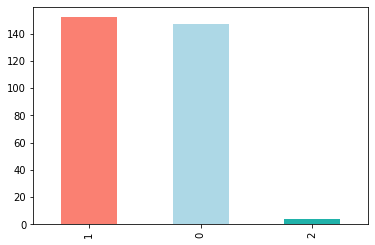

In [28]:
df["restecg"].value_counts().plot(kind="bar", color=["salmon", "lightblue", "lightseagreen"]);

In [29]:
df["restecg"].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

##thalach

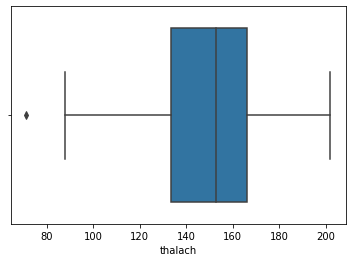

In [30]:
#boxplot contains no outliers
sns.boxplot(x="thalach",data=df)

In [31]:
#All above this quantile is considered an outlier.
#the values of samples higher than this, will be sat to the value of the .75 quantile
df["thalach"].quantile(0.01)

95.02

In [32]:
df["thalach"].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [33]:
df["thalach"] = np.where(df["thalach"] < 95, 133, df["thalach"])

In [34]:
#max value is now 170
df["thalach"].describe()

count    303.000000
mean     150.141914
std       21.961503
min       95.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

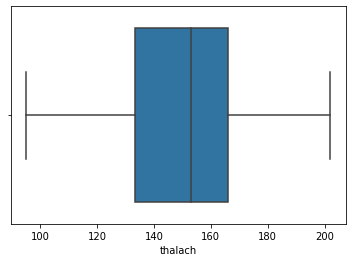

In [35]:
#boxplot contains no outliers
sns.boxplot(x="thalach",data=df)

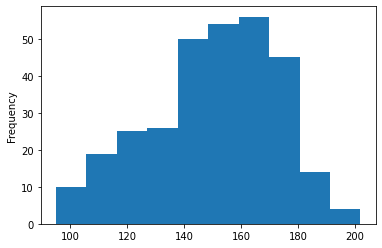

In [36]:
df["thalach"].plot(kind="hist");

###Evaluation

Outliers in the min-range has been changed to the value of the 0.25 percentile.

Most values now have a range between 140-180.

##exang

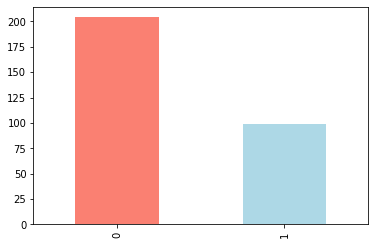

In [37]:
df["exang"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

##oldpeak

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,id
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,171
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,288
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,163
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,212
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,250


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


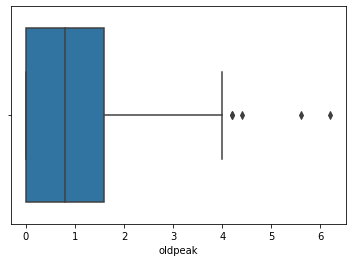

In [39]:
sns.boxplot("oldpeak",data=df)

In [40]:
df["oldpeak"].quantile(0.98)

4.0

In [41]:
df["oldpeak"].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [42]:
df["oldpeak"] = np.where(df["oldpeak"] > 4, 1.6, df["oldpeak"])

In [43]:
df["oldpeak"].describe()

count    303.000000
mean       0.984818
std        1.043888
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        4.000000
Name: oldpeak, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


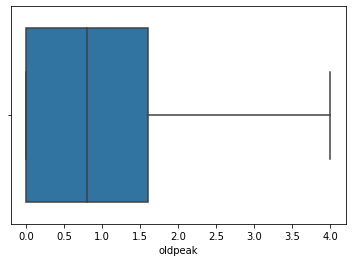

In [44]:
sns.boxplot("oldpeak",data=df)

##slope

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,id
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,171
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,288
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,163
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,212
250,51,1,0,140,298,0,1,122,1,1.6,1,3,3,250


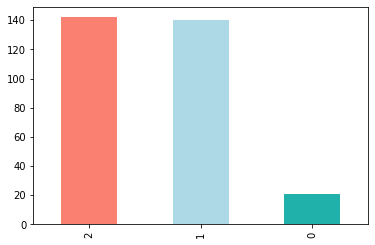

In [46]:
df["slope"].value_counts().plot(kind="bar", color=["salmon", "lightblue", "lightseagreen"]);

##ca

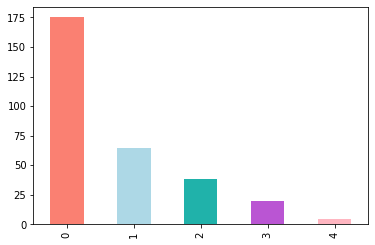

In [47]:
df["ca"].value_counts().plot(kind="bar", color=["salmon", "lightblue","lightseagreen","mediumorchid", "lightpink"]);

##thal

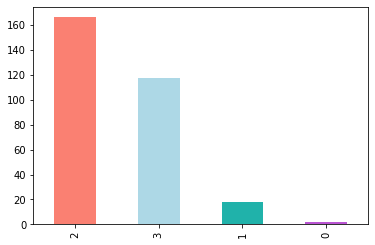

In [48]:
df["thal"].value_counts().plot(kind="bar", color=["salmon", "lightblue", "lightseagreen", "mediumorchid"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


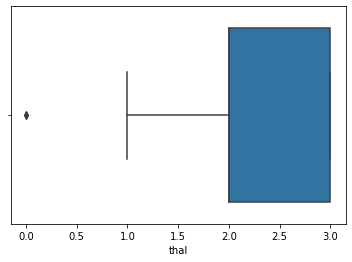

In [49]:
sns.boxplot("thal",data=df)

In [50]:
df["thal"].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

#Data preparation

Features to be one-hot encoded:
- cp
- restecg
- slope
- ca
- thal

Features which already are label-encoded:
- sex
- fbs
- ca

Everything will be normalized after.

In [51]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,id
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,171
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,288
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,163
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,212
250,51,1,0,140,298,0,1,122,1,1.6,1,3,3,250


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 171 to 77
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  id        303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


##One hot encoding

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [54]:
X = df

In [55]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,id
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,171
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,288
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,163
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,212
250,51,1,0,140,298,0,1,122,1,1.6,1,3,3,250


In [56]:
ohe = OneHotEncoder(categories='auto')
X = ohe.fit_transform(df[['cp','restecg',"slope","ca","thal"]]).toarray()

In [57]:
type(X), X.shape

(numpy.ndarray, (303, 19))

In [58]:
X[0]

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1.])

In [59]:
df_array = np.array(df.drop(['cp','restecg',"slope","ca","thal"],axis=1))
df_array[0]

array([ 48.,   1., 110., 229.,   0., 168.,   0.,   1., 171.])

In [60]:
X = np.append(df_array,X,axis=1)

In [61]:
#NOTE: 
# X[:,8] is the id
X[:3]

array([[ 48.,   1., 110., 229.,   0., 168.,   0.,   1., 171.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.],
       [ 57.,   1., 110., 335.,   0., 143.,   1.,   3., 288.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.],
       [ 38.,   1., 138., 175.,   0., 173.,   0.,   0., 163.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.]])

In [62]:
X.shape

(303, 28)

##Normalize data

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X[:3]

array([[0.39583333, 1.        , 0.21052632, 0.23515982, 0.        ,
        0.68224299, 0.        , 0.25      , 0.56622517, 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.58333333, 1.        , 0.21052632, 0.47716895, 0.        ,
        0.44859813, 1.        , 0.75      , 0.95364238, 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.1875    , 1.        , 0.57894737, 0.11187215, 0.        ,
        0.72897196, 0.        , 0.        , 0.5397351 , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.    

In [65]:
scaler.inverse_transform(X)[:3]

array([[ 48.,   1., 110., 229.,   0., 168.,   0.,   1., 171.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.],
       [ 57.,   1., 110., 335.,   0., 143.,   1.,   3., 288.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.],
       [ 38.,   1., 138., 175.,   0., 173.,   0.,   0., 163.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.]])

#Modelling

##Create SOM

In [66]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.8-cp37-none-any.whl size=8604 sha256=9e2614b4677391afa92192770a44d01efcc6a5da336d131677bf6b0b4aa14667
  Stored in directory: /root/.cache/pip/wheels/78/7e/a8/435947263149d3b94fa65339751f8c65617c436b0bdfb29c7d
Successfully built MiniSom


In [67]:
from minisom import MiniSom

In [68]:
X.shape #28 features

(303, 28)

In [69]:
som = MiniSom(x=10,
              y=10,
              input_len=X.shape[1],
              sigma=1,
              learning_rate=0.5,
              random_seed=42)

som.random_weights_init(X)
som.train_random(X,100, verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.9766642601203163


##Visualize map

In [70]:
from pylab import bone, pcolor, colorbar, plot, show

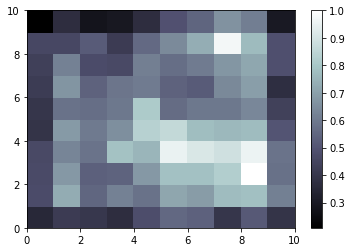

In [71]:
pcolor(som.distance_map().T)
colorbar()
bone()

##Evaluation

I will find the dataframe rows contained in the winning nodes and compare some of the features.

In [89]:
mapping = som.win_map(X)
cord1 = (5,3)
cord2 = (7,8)
cord3 = (8,2)

In [90]:
np.array(mapping[cord1]).shape, np.array(mapping[cord2]).shape, np.array(mapping[cord3]).shape

((2, 28), (1, 28), (4, 28))

In [91]:
winners = np.concatenate([mapping[cord1],mapping[cord2], mapping[cord3]],axis=0)

In [92]:
len(winners)

7

In [93]:
winners[0]

array([0.8125    , 1.        , 0.65789474, 0.15296804, 1.        ,
       0.42990654, 0.        , 0.85      , 0.99337748, 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        ])

In [94]:
winners = scaler.inverse_transform(winners)

In [95]:
winners[0]

array([ 68. ,   1. , 144. , 193. ,   1. , 141. ,   0. ,   3.4, 300. ,
         1. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ,
         0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         1. ])

In [96]:
ids = winners[:,8]
ids

array([300., 197., 144., 285., 262., 198., 260.])

In [98]:
winner_df = df[df["id"].isin(ids)]

In [100]:
winner_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,id
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,285
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,300
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,262
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,198
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,144
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,197
260,66,0,0,140,228,1,1,165,1,1.0,1,2,3,260


The SOM definetly has keep the data patterns as many of these values are quite close to eachother.

I will plot a few of them and compare them to the value-range of the original values.

###CP

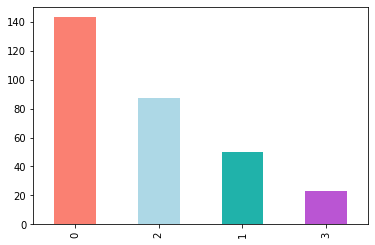

In [107]:
#Destribution of cp
df["cp"].value_counts().plot(kind="bar", color=["salmon", "lightblue","lightseagreen","mediumorchid"]);

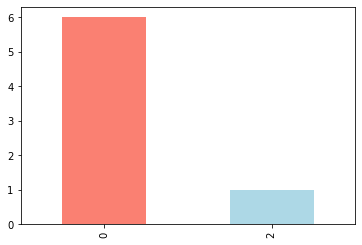

In [108]:
#Values containing 1 and 3 are gone
winner_df["cp"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

###Restecg

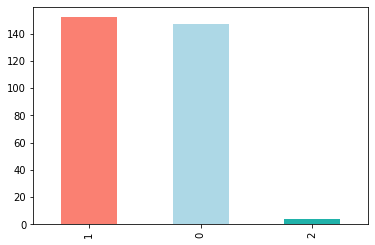

In [109]:
df["restecg"].value_counts().plot(kind="bar", color=["salmon", "lightblue", "lightseagreen"]);

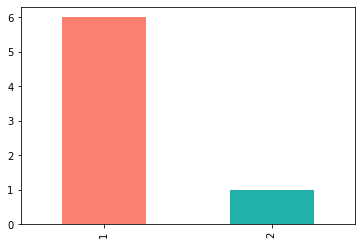

In [110]:
#No occurences of restecg=0
winner_df["restecg"].value_counts().plot(kind="bar", color=["salmon", "lightseagreen"]);

##thal

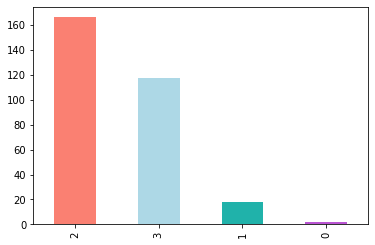

In [ ]:
df["thal"].value_counts().plot(kind="bar", color=["salmon", "lightblue", "lightseagreen", "mediumorchid"]);

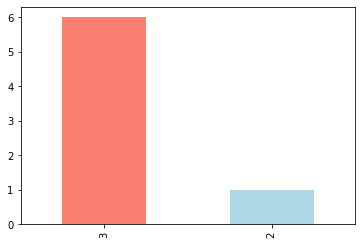

In [115]:
winner_df["thal"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

#Evaluation

The SOM found rows from the dataframe which are alike. Since this data orignal reflected patients with or without a heartdisease, I do wonder if the winner_df actually reflects that. I feel like it more reflects patients who are in a specific "health group" more than it reflects wether or not they have a heart disease.